In [113]:
import pandas as pd
a = pd.read_excel('Data.xlsx')
a
import numpy as np

In [114]:
d12 = a[[ 'DATE','DAY','TOTAL','WEEK NUMBER']]
d12


,DATE,DAY,TOTAL,WEEK NUMBER
0,2020-06-19,FRIDAY,22,WEEK 1
1,2020-06-19,FRIDAY,10,WEEK 1
2,2020-06-19,FRIDAY,14,WEEK 1
3,2020-06-19,FRIDAY,18,WEEK 1
4,2020-06-19,FRIDAY,10,WEEK 1
...,...,...,...,...
1536,2020-07-22,WEDNESDAY,14,WEEK 5
1537,2020-07-22,WEDNESDAY,14,WEEK 5
1538,2020-07-22,WEDNESDAY,28,WEEK 5
1539,2020-07-22,WEDNESDAY,14,WEEK 5


In [129]:
def top(g):
    return g['DAY'].value_counts().idxmax()
topdf = d12.groupby('DATE').apply(top)
topdf = topdf.to_frame()
topdf.columns = ['DAY']
topdf

,DAY
DATE,
2020-06-19,FRIDAY
2020-06-20,SATURDAY
2020-06-21,SUNDAY
2020-06-24,WEDNESDAY
2020-06-25,THURSDAY
2020-06-26,FRIDAY
2020-06-27,SATURDAY
2020-06-28,SUNDAY
2020-06-29,MONDAY


In [116]:

d13 = topdf['DAY'].value_counts()
d13 = d13.to_frame()

In [117]:

d13.index.names = ['DAY']
d13.columns = ['DAYS']
d13

,DAYS
DAY,
FRIDAY,5
WEDNESDAY,5
SATURDAY,5
SUNDAY,5
MONDAY,4
TUESDAY,3
THURSDAY,2


In [118]:
group4 = d12.groupby('DAY')
d14 = group4['TOTAL'].agg([np.sum])
d14


,sum
DAY,
FRIDAY,4731
MONDAY,2241
SATURDAY,3518
SUNDAY,3139
THURSDAY,1978
TUESDAY,3935
WEDNESDAY,3192


In [119]:
e = pd.merge(d14, d, on='DAY', how='outer')
e

,sum,DAYS
DAY,,
FRIDAY,4731,5
MONDAY,2241,4
SATURDAY,3518,5
SUNDAY,3139,5
THURSDAY,1978,2
TUESDAY,3935,3
WEDNESDAY,3192,5


In [120]:
e['Average day of week'] = e['sum']/e['DAYS']

In [121]:
e

,sum,DAYS,Average day of week
DAY,,,
FRIDAY,4731,5,946.200000
MONDAY,2241,4,560.250000
SATURDAY,3518,5,703.600000
SUNDAY,3139,5,627.800000
THURSDAY,1978,2,989.000000
TUESDAY,3935,3,1311.666667
WEDNESDAY,3192,5,638.400000


In [122]:
e = e.sort_values('Average day of week', ascending = False)

In [130]:
e.columns = ['Total revenue for this day', 'Number of working days', 'Average revenue']
e

,Total revenue for this day,Number of working days,Average revenue
DAY,,,
MONDAY,2241,4,560.250000
TUESDAY,3935,3,1311.666667
WEDNESDAY,3192,5,638.400000
THURSDAY,1978,2,989.000000
FRIDAY,4731,5,946.200000
SATURDAY,3518,5,703.600000
SUNDAY,3139,5,627.800000


In [132]:
e['Average revenue'][1] + e['Average revenue'][3] + e['Average revenue'][4:].sum() 

4578.266666666667

In [124]:
'''
Even though Tuesdays and Thursdays see a good business than other days of the week, 
the restaurant was closed on two Tuesdays and 3 Thursdays in the 5 weeks. 
So, it is suggested to change this, and to keep the restaurant closed on either 
Monday's or Wednesday's for Sanitization and Maintenance purpose. 
The average business of Tuesdays, Thursdays, Fridays and the weekends is 865$
The average business of Wednesdays and Mondays is 582$.
This action will add up the revenue by around 285$ every week, i.e. , 1140$ a month.
Business performance will improve by around 6%
'''

"\nEven though Tuesdays and Thursdays see a good business than other days of the week, \nthe restaurant was closed on two Tuesdays and 3 Thursdays in the 5 weeks. \nSo, it is suggested to change this, and to keep the restaurant closed on either \nMonday's or Wednesday's for Sanitization and Maintenance purpose. \nThe average business of Tuesdays, Thursdays, Fridays and the weekends is 865$\nThe average business of Wednesdays and Mondays is 582$.\nThis action will add up the revenue by around 285$ every week, i.e. , 1140$ a month.\nBusiness performance will improve by around 6%\n"

In [125]:
e = e.loc[['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'], :]
e

,sum,DAYS,Average day of week
DAY,,,
MONDAY,2241,4,560.250000
TUESDAY,3935,3,1311.666667
WEDNESDAY,3192,5,638.400000
THURSDAY,1978,2,989.000000
FRIDAY,4731,5,946.200000
SATURDAY,3518,5,703.600000
SUNDAY,3139,5,627.800000


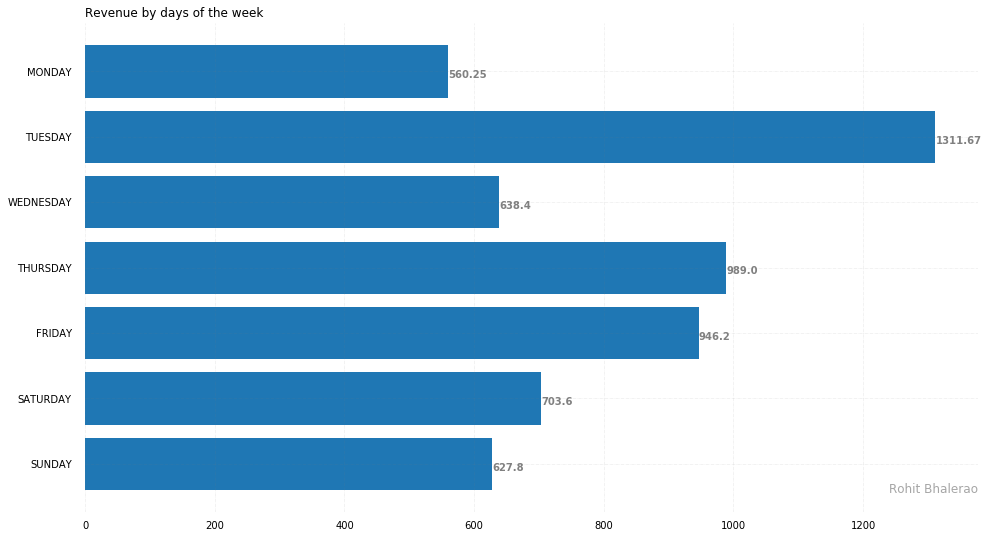

In [126]:
from matplotlib import pyplot as plt 
  
# Read CSV into pandas 

Day = e.index 
Average = e['Average day of week'] 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(Day, Average) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Revenue by days of the week', 
             loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15, 'Rohit Bhalerao', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
  
# Show Plot 
plt.show() 

In [ ]:
st.markdown("Even though Tuesdays and Thursdays see a good business than other days of the week, 
            the restaurant was closed on 2 Tuesdays and 3 Thursdays in the 5 weeks. So, it is suggested to change 
            this, and to keep the restaurant closed on either Monday's or Wednesday's for Sanitization and Maintenance purpose. 
            The average business of Tuesdays, Thursdays, Fridays and the weekends is %i $. 
            The average business of Wednesdays and Mondays is %i $.
            This action will add up the revenue by around %i $ every week, i.e. , %i $ a month. 
            Business performance will improve by around %i %" %(a1, a2 , a3 , a3 * 4 , a5))


In [160]:
a1 = (e['Average revenue'][1] + e['Average revenue'][3] + e['Average revenue'][4:].sum())/5
a1

915.6533333333334

In [161]:
a2 = (e['Average revenue'][0] + e['Average revenue'][2])/2 
a2

599.325

In [162]:
a3 = a1 - a2


In [163]:
a3

316.3283333333334

In [164]:
a3 * 4

1265.3133333333335

In [165]:
a4 = a['TOTAL'].sum()

In [166]:
a5 = (a3 * 4) / (a['TOTAL'].sum()) * 100

In [167]:
a5

5.5657312102284395

In [168]:
type(a1)

numpy.float64

In [169]:
type(a2)

numpy.float64

In [170]:
type(a3)

numpy.float64

In [171]:
type(a4)

numpy.int64

In [174]:
type(a5)

numpy.float64